## Task 7 : Stock Market Prediction using Numerical and Textual Analysis

### Wael Rabah

GripAug21

This project was developed as part of the Data Science & Business Analytics Internship with The Sparks Foundation .

The goal of this task is to create a hybrid model for stock price prediction using numerical analysis of stock prices, and sentiment analysis of news headlines.

News dataset link : https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DPQMQH

### Installing libraries

In [ ]:
!pip install yfinance

### Importing the news dataset

In [ ]:
import subprocess
import yfinance as yf
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/news_data/news-dataset.csv  .

In [ ]:
news_df=pd.read_csv('news-dataset.csv')

In [ ]:
news_df.shape

(3424067, 3)

In [ ]:
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


### Data exploration and feature engineering

In [ ]:
# unique headline_category column values
news_df.headline_category.unique(),len(news_df.headline_category.unique())

(array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
        'elections.assembly-elections.bihar',
        'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
       dtype=object), 1013)

In [ ]:
news_df.headline_category.value_counts()

india                                   288541
unknown                                 209582
city.mumbai                             134428
city.delhi                              127717
business.india-business                 116761
                                         ...  
profiles.india-profiles                      8
himachal-pradesh                             8
indias-vision                                8
business.mf-simplified.faq                   8
sports.tennis.top-stories.tennis-atp         8
Name: headline_category, Length: 1013, dtype: int64

In [ ]:
#Checking if all headlines are unique 
news_df['headline_text'].value_counts().count()

3168800

In [ ]:
#dropping duplicate rows
news_df.drop_duplicates(subset=list(news_df.columns),inplace=True)

In [ ]:
news_df.reset_index(inplace=True)
news_df=news_df.drop(labels=['index'],axis=1)

In [ ]:
unique_publish_dates=list(news_df.publish_date.unique())

In [ ]:
# combining headlines by date to check general sentiment in that day
combined_headlines=[]
for d in unique_publish_dates :
  rows_for_date=news_df[news_df.publish_date==d]
  rows=rows_for_date.T.to_dict().values()
  combined_headline_text=""
  for row in rows :
    combined_headline_text+= row['headline_text'] if combined_headline_text=="" else ", "+row['headline_text']
  combined_headlines.append(combined_headline_text)

In [ ]:
combined_headlines_news_df=pd.DataFrame({
    "publish_date" : unique_publish_dates ,
    "combined_headline":combined_headlines
})

In [ ]:
from textblob import TextBlob

# We'll use TextBlob to get the general sentiment of that day by calculating the polarity and subjectivity of the authors of those articles 

combined_headlines_news_df['polarity']=combined_headlines_news_df.combined_headline.apply(lambda x : TextBlob(x).sentiment[0])
combined_headlines_news_df['subjectivity']=combined_headlines_news_df.combined_headline.apply(lambda x : TextBlob(x).sentiment[1])

In [ ]:
combined_headlines_news_df.head()

,publish_date,combined_headline,polarity,subjectivity
0,20010102,Status quo will not be disturbed at Ayodhya; s...,0.193519,0.293056
1,20010103,"Powerless north India gropes in the dark, Thin...",0.088462,0.407692
2,20010104,The string that pulled Stephen Hawking to Indi...,0.088034,0.481895
3,20010105,Light combat craft takes India into club class...,0.257415,0.465542
4,20010106,Light combat craft takes India into club class...,0.219481,0.464935


In [ ]:
combined_headlines_news_df

,publish_date,combined_headline,polarity,subjectivity
0,20010102,Status quo will not be disturbed at Ayodhya; s...,0.193519,0.293056
1,20010103,"Powerless north India gropes in the dark, Thin...",0.088462,0.407692
2,20010104,The string that pulled Stephen Hawking to Indi...,0.088034,0.481895
3,20010105,Light combat craft takes India into club class...,0.257415,0.465542
4,20010106,Light combat craft takes India into club class...,0.219481,0.464935
...,...,...,...,...
7257,20201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.035346,0.396452
7258,20201228,Horoscope Today; 28 December 2020: Check astro...,0.070784,0.414510
7259,20201229,Man recovers charred remains of 'thief' from h...,0.061210,0.424021
7260,20201230,Numerology Readings 30 December 2020: Predicti...,0.043496,0.441660


### Downloading the stock data

In [ ]:
bsen_data = yf.download('^BSESN', start='2001-01-01', end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


### Data Exploration

In [ ]:
bsen_data[bsen_data['Volume']>0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000
...,...,...,...,...,...,...
2020-12-23,46072.300781,46513.320312,45899.101562,46444.179688,46444.179688,10500
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600


In [ ]:
combined_headlines_news_df.publish_date=pd.to_datetime(combined_headlines_news_df.publish_date,format="%Y%m%d")
combined_headlines_news_df=combined_headlines_news_df.rename(columns={"publish_date":"Date"})

In [ ]:
df=pd.merge(left=bsen_data,right=combined_headlines_news_df,on="Date")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4892 entries, 0 to 4891
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4892 non-null   datetime64[ns]
 1   Open               4892 non-null   float64       
 2   High               4892 non-null   float64       
 3   Low                4892 non-null   float64       
 4   Close              4892 non-null   float64       
 5   Adj Close          4892 non-null   float64       
 6   Volume             4892 non-null   int64         
 7   combined_headline  4892 non-null   object        
 8   polarity           4892 non-null   float64       
 9   subjectivity       4892 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 420.4+ KB


In [ ]:
df=df[df.Volume > 0]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df=df.drop(labels=['index'],axis=1)

In [ ]:
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume,combined_headline,polarity,subjectivity
0,2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200,"Hot enough or fast enough?, Fat can be addicti...",0.024271,0.385211
1,2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800,"New boat building yard to be set up in Kochi, ...",0.061136,0.445994
2,2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400,"MD's fake diploma finally gets him, India to s...",0.060089,0.348039
3,2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000,"Indians are unwilling to swipe their cards, So...",-0.008556,0.390488
4,2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000,Airtel receives Govt nod for additional spectr...,0.006117,0.417935


In [ ]:
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Time series decomposition
!pip install stldecompose
from stldecompose import decompose

**We start by drawing an OHLC (open/high/low/close) chart to get a sense of historical prices** <br />
**We also draw a volume chart to sense how many stocks were traded everyday**

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df_close = df[['Date', 'Close']].copy()
df_close = df_close.set_index('Date')
df_close.head()



,Close
Date,
2003-07-14,3720.750000
2003-07-15,3686.340088
2003-07-16,3721.649902
2003-07-17,3668.909912
2003-07-18,3647.580078


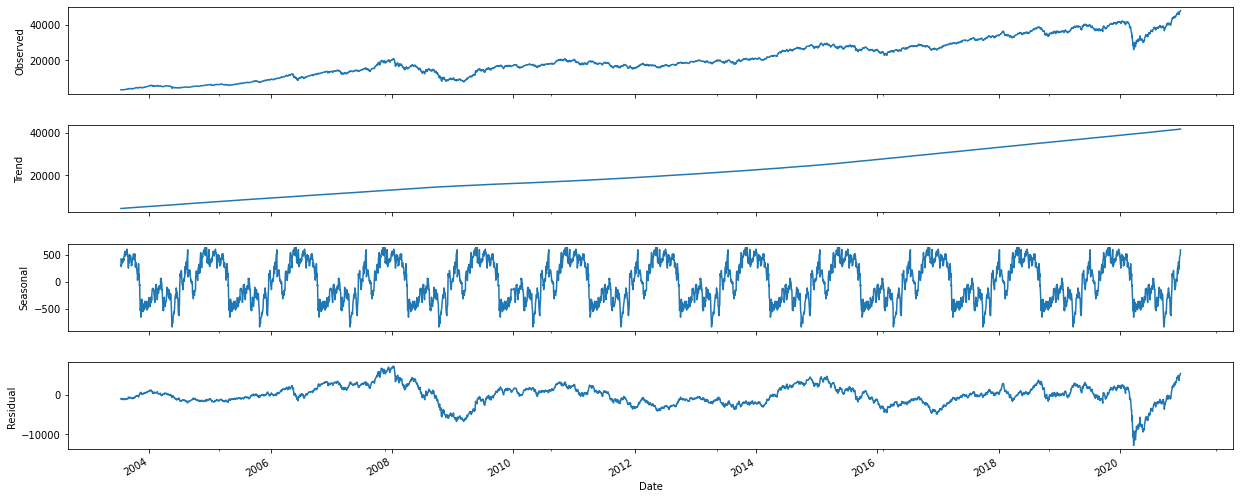

In [ ]:
decomp = decompose(df_close, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

By visualizing trend and seasonality we can understand the behaviour of the stock 

### Feature engineering

In [ ]:
# We'll calculate few moving average to represent how the stock behaves over a priod of time which we will use as features for our model

df['EMA_9'] = df['Close'].ewm(9).mean().shift()
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_10'] = df['Close'].rolling(10).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_5, name='SMA 5'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_15, name='SMA 15'))
fig.add_trace(go.Scatter(x=df.Date, y=df.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.2))
fig.show()

In [ ]:
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

In [ ]:
#We'll use the RSI indicator to check if a stock is oversold and if the price of the stock can recover
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

In [ ]:
df['Close'] = df['Close'].shift(-1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,combined_headline,polarity,subjectivity,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,MACD,MACD_signal,RSI
0,2003-07-14,3704.629883,3726.560059,3704.629883,3686.340088,3720.750000,21200,"Hot enough or fast enough?, Fat can be addicti...",0.024271,0.385211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-07-15,3719.169922,3733.879883,3657.179932,3721.649902,3686.340088,22800,"New boat building yard to be set up in Kochi, ...",0.061136,0.445994,3720.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2003-07-16,3702.139893,3729.020020,3662.699951,3668.909912,3721.649902,18400,"MD's fake diploma finally gets him, India to s...",0.060089,0.348039,3702.639520,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2003-07-17,3728.840088,3750.000000,3660.340088,3647.580078,3668.909912,22000,"Indians are unwilling to swipe their cards, So...",-0.008556,0.390488,3709.654421,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2003-07-18,3651.389893,3684.229980,3625.729980,3569.580078,3647.580078,22000,Airtel receives Govt nod for additional spectr...,0.006117,0.417935,3697.806643,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Data cleaning and preprocessing

In [ ]:
df = df.iloc[33:] # Because of moving averages and MACD line
df = df[:-1]      # Because of shifting close price

df.index = range(len(df))

In [ ]:
y = df['Close'].copy()
X = df.drop(['Close'], 1)

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler , Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

In [ ]:
X_Normalizer=Normalizer()
X[[ 'polarity', 'subjectivity', 'EMA_9', 'SMA_5',
       'SMA_10', 'SMA_15', 'SMA_30', 'MACD', 'MACD_signal', 'RSI']]=X_Normalizer.fit_transform(X[[ 'polarity', 'subjectivity', 'EMA_9', 'SMA_5',
       'SMA_10', 'SMA_15', 'SMA_30', 'MACD', 'MACD_signal', 'RSI']])

In [ ]:
test_size  = 0.1
valid_size = 0.1
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size,shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split( X_train, y_train, test_size=valid_size, random_state=42)


In [ ]:
drop_cols = ['Date', 'Volume', 'Open', 'Low', 'High', 'combined_headline','Adj Close']

X_train = X_train.drop(drop_cols, 1)
X_valid = X_valid.drop(drop_cols, 1)
X_test  = X_test.drop(drop_cols, 1)

In [ ]:
X_train.head()

,polarity,subjectivity,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,MACD,MACD_signal,RSI
76,0.000010,0.000040,0.443945,0.458705,0.451936,0.445876,0.434932,0.011767,0.009857,0.007099
2665,0.000002,0.000007,0.445531,0.448274,0.450118,0.450015,0.441970,0.006054,0.007595,0.001000
432,0.000009,0.000024,0.446857,0.450990,0.449979,0.444948,0.443210,0.001584,0.000097,0.005412
862,0.000002,0.000011,0.446043,0.448213,0.450802,0.448381,0.442544,0.003383,0.004751,0.001761
2069,0.000002,0.000011,0.446886,0.454036,0.448924,0.444665,0.441434,0.003814,0.000707,0.002342



We'll use an unconventional method for time series forecasting , We'll use the Moving averages that we calculated , the MACD and RSI and the subjectivity and polarity metrics retrieved from the sentiment analysis phase to train our XGBoost regressor .


### Hyper-Parameter tuning

In [ ]:
%%time

parameters = {
    'n_estimators': [100,500,1000,2000],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'colsample_bytree': [ 0.7],
    'subsample': [0.2],
    'max_depth': [ 5],
    'gamma': [0.001,.002,.01]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set,objective="reg:squarederror", verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'colsample_bytree': 0.7, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.2}
Best validation score = 0.9843321299989711
CPU times: user 7min 41s, sys: 3.18 s, total: 7min 44s
Wall time: 7min 43s


### Training the model with the best hyper-parameters

In [ ]:
%%time
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')


CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 43.4 µs


In [ ]:
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:20734.6	validation_1-rmse:20918
[1]	validation_0-rmse:20530.6	validation_1-rmse:20713.3
[2]	validation_0-rmse:20327.9	validation_1-rmse:20509
[3]	validation_0-rmse:20127.2	validation_1-rmse:20307
[4]	validation_0-rmse:19928.3	validation_1-rmse:20107
[5]	validation_0-rmse:19732.1	validation_1-rmse:19909.8
[6]	validation_0-rmse:19538.4	validation_1-rmse:19714.6
[7]	validation_0-rmse:19346.4	validation_1-rmse:19521
[8]	validation_0-rmse:19155.1	validation_1-rmse:19329.1
[9]	validation_0-rmse:18966.6	validation_1-rmse:19139.8
[10]	validation_0-rmse:18779.4	validation_1-rmse:18951.8
[11]	validation_0-rmse:18593.7	validation_1-rmse:18765.7
[12]	validation_0-rmse:18409.8	validation_1-rmse:18581.1
[13]	validation_0-rmse:18227.6	validation_1-rmse:18397.6
[14]	validation_0-rmse:18047.1	validation_1-rmse:18217.1
[15]	validation_0-rmse:17869.4	validation_1-rmse:18038.3
[16]	validation_0-rmse:17692.6	validation_1-rmse:17860.5
[17]	validation_0-rmse:17518.8	validation_1-rmse:17

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.001,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.2, verbosity=1)

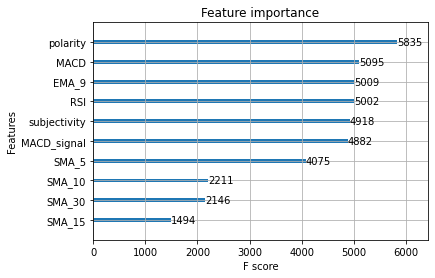

In [ ]:
plot_importance(model);

### Predicted and true prices comparison

In [ ]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [38862.23046875 38700.53125    38939.21875    38585.3515625
 38607.01171875]
y_pred = [38359.996 38416.766 38221.176 38179.2   38040.234]


In [ ]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 7925737.095788822


In [ ]:
predicted_prices = df.loc[y_test.index[0]:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()